In [129]:
import pandas as pd
import numpy as np
import json
import gmaps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests
from scipy.stats import linregress
import matplotlib.cm as cm
from scipy.stats import norm
import statistics

#from census import Census

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [130]:
path = "CSV statistics/RB_2020.csv"
rb2020 = pd.read_csv(path)
rb2020['YDS'] = rb2020['YDS'].str.replace(',', '').astype(float)


In [131]:
mask = rb2020.G > 10
rb2020 = rb2020[mask]
rb2020.dropna().reset_index(drop=True)


rb2020.describe()

,Rank,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,FL,G,FPTS,FPTS/G
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,75.481132,88.962264,391.858491,3.677358,28.424528,0.0,3.226415,19.886792,26.292453,146.811321,6.872642,0.773585,0.500000,14.358491,86.363208,6.060377
std,63.043180,82.370929,391.030103,1.562555,23.287008,0.0,3.918899,17.691710,22.821446,138.340788,2.612736,1.165235,0.897085,1.634093,79.602166,5.532427
min,1.000000,0.000000,-1.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
25%,28.500000,11.250000,59.250000,3.325000,10.000000,0.0,0.000000,6.250000,9.000000,45.250000,5.425000,0.000000,0.000000,13.000000,16.775000,1.100000
50%,62.500000,80.500000,302.000000,4.200000,24.000000,0.0,2.000000,16.000000,20.000000,114.000000,7.000000,0.000000,0.000000,15.000000,68.150000,4.650000
75%,105.750000,144.750000,650.250000,4.675000,41.500000,0.0,5.750000,28.750000,40.000000,209.500000,8.375000,1.000000,1.000000,16.000000,140.075000,9.325000
max,274.000000,378.000000,2027.000000,6.000000,98.000000,0.0,17.000000,83.000000,110.000000,756.000000,14.300000,5.000000,5.000000,16.000000,336.300000,22.600000


In [132]:
rb2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 273
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    106 non-null    float64
 1   Player  106 non-null    object 
 2   ATT     106 non-null    float64
 3   YDS     106 non-null    float64
 4   Y/A     106 non-null    float64
 5   LG      106 non-null    float64
 6   20+     106 non-null    float64
 7   TD      106 non-null    float64
 8   REC     106 non-null    float64
 9   TGT     106 non-null    float64
 10  YDS.1   106 non-null    float64
 11  Y/R     106 non-null    float64
 12  TD.1    106 non-null    float64
 13  FL      106 non-null    float64
 14  G       106 non-null    float64
 15  FPTS    106 non-null    float64
 16  FPTS/G  106 non-null    float64
 17  OWN     106 non-null    object 
dtypes: float64(16), object(2)
memory usage: 15.7+ KB


In [133]:
inputs = ['ATT','YDS','Y/A']
feature = rb2020[inputs]
target = rb2020['TD']

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TD   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     149.7
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           3.20e-37
Time:                        21:46:40   Log-Likelihood:                -205.28
No. Observations:                 106   AIC:                             418.6
Df Residuals:                     102   BIC:                             429.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1069      0.448      0.239      0.812      -0.782       0.996
ATT           -0.0075      0.011     -0.708      0.481      -0.028       0.013
YDS            0.0109      0.002      4.773      0.000       0.006       0.015
Y/A           -0.1273      0.128     -0.997      0.321      -0.380       0.126
==============================================================================
Omnibus:                       28.670   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.478
Skew:                           0.948   Prob(JB):                     4.07e-17
Kurtosis:                       6.674   Cond. No.                     1.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-135-6a770f641f33>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Alvin Kamara (NO)
Derrick Henry (TEN)
Dalvin Cook (MIN)
David Montgomery (CHI)
Aaron Jones (GB)
Jonathan Taylor (IND)
James Robinson (JAC)
Josh Jacobs (LV)
Nick Chubb (CLE)
Kareem Hunt (CLE)
Ezekiel Elliott (DAL)
Antonio Gibson (WAS)
Melvin Gordon III (DEN)
Kenyan Drake (LV)
Mike Davis (ATL)
Ronald Jones II (TB)
Chris Carson (SEA)
D'Andre Swift (DET)
David Johnson (HOU)
Nyheim Hines (IND)
J.K. Dobbins (BAL)
Clyde Edwards-Helaire (KC)
Miles Sanders (PHI)
J.D. McKissic (WAS)
Todd Gurley II (FA)
James Conner (ARI)
Player #26 was not added
Chase Edmonds (ARI)
Player #28 was not added
Jeff Wilson Jr. (SF)
Giovani Bernard (TB)
Wayne Gallman (SF)
Latavius Murray (NO)
Devin Singletary (BUF)
Gus Edwards (BAL)
Darrell Henderson (LAR)
Adrian Peterson (FA)
Leonard Fournette (TB)
Jamaal Williams (DET)
Jerick McKinnon (KC)
Tony Pollard (DAL)
Malcolm Brown (MIA)
Cam Akers (LAR)
Player #43 was not added
Zack Moss (BUF)
Frank Gore (FA)
James White (NE)
Player #47 was not added
Player #48 was not added


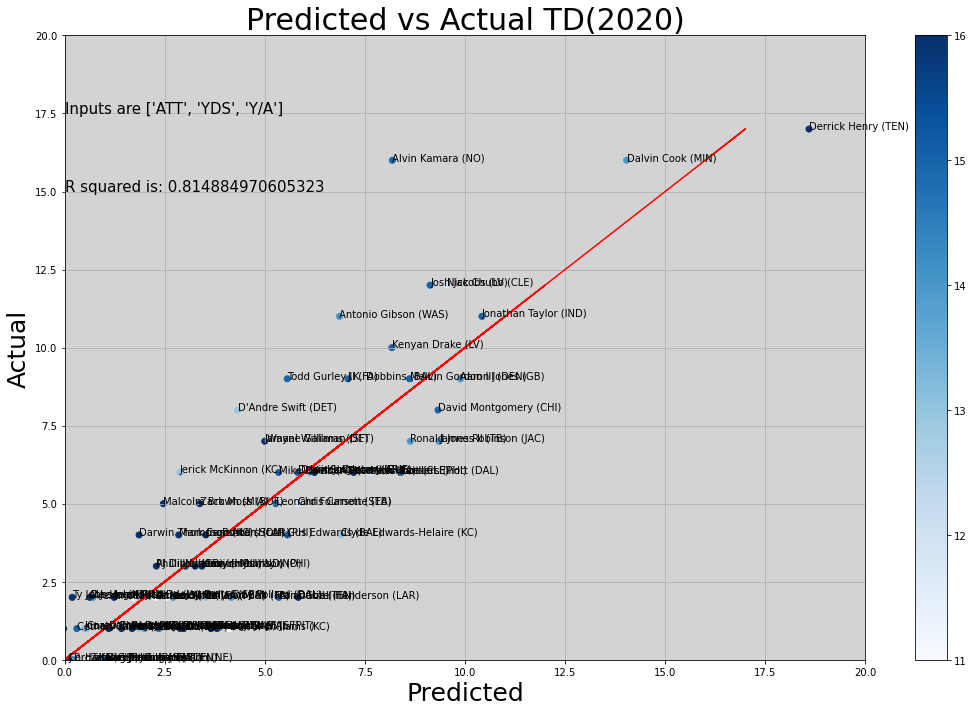

In [135]:
plt.figure(figsize=(15,10))
weight = rb2020.G
plt.scatter(results.fittedvalues, rb2020.TD,marker="o",c= weight,cmap='Blues')

plt.xlim(0,20)
plt.ylim(0,20)
plt.xlabel("Predicted",fontsize=25)
plt.ylabel("Actual",fontsize=25)
plt.title("Predicted vs Actual TD(2020)",fontsize=30)
plt.plot(rb2020.TD, rb2020.TD,color='red')
plt.tight_layout()
plt.annotate(f'R squared is: {results.rsquared}',(0,15),fontsize=15)
plt.annotate(f'Inputs are {inputs}',(0,17.5),fontsize=15)
plt.grid()
plt.colorbar()
ax = plt.axes()
ax.set(facecolor='lightgray')

n = rb2020.Player

for i,txt in enumerate(n):
    try:
        print(rb2020.Player[i])
        plt.annotate(txt, (results.fittedvalues[i], qb2020.TD[i]))
    except:
        print(f'Player #{i} was not added')

plt.tight_layout()
plt.show()

In [136]:
predicted = results.fittedvalues
actual = rb2020.TD
name = rb2020.Player
games = rb2020.G
difference  = rb2020.TD - results.fittedvalues
rbDict = {'Name':name,'Games':games,'Predicted':predicted,'Actual':actual,'Difference':difference}
predDf = pd.DataFrame(rbDict)
pd.set_option('max_rows', None)

predDf.sort_values('Difference',ascending=False)

,Name,Games,Predicted,Actual,Difference
0,Alvin Kamara (NO),15.0,8.186971,16.0,7.813029
11,Antonio Gibson (WAS),14.0,6.865454,11.0,4.134546
17,D'Andre Swift (DET),13.0,4.323301,8.0,3.676699
24,Todd Gurley II (FA),15.0,5.561460,9.0,3.438540
37,Leonard Fournette (TB),13.0,2.880921,6.0,3.119079
7,Josh Jacobs (LV),15.0,9.127276,12.0,2.872724
39,Jerick McKinnon (KC),16.0,2.466910,5.0,2.533090
8,Nick Chubb (CLE),12.0,9.553293,12.0,2.446707
70,Peyton Barber (WAS),16.0,1.860401,4.0,2.139599
36,Adrian Peterson (FA),16.0,4.999091,7.0,2.000909


62